In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\Owner\OneDrive - University of Bradford\Dissertation\Data\research_dataset.csv")

data["UUU"] = pd.to_numeric(data["UUU"], errors = 'coerce')
data["UUC"] = pd.to_numeric(data["UUC"], errors = 'coerce')

data = data.replace(np.nan, 0, regex=True)

data = data.reset_index()

data.head(2)

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,index,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,bct,0,43130,10120,Onion yellow dwarf virus,0.02421,0.01591,0.02233,0.01798,...,0.00336,0.01443,0.00593,0.04397,0.01996,0.04012,0.02223,0.00000,0.00000,0.00030
1,1,bct,0,105154,1455,Chlamydia phage Chp2,0.03505,0.01787,0.02405,0.01856,...,0.00481,0.01993,0.01031,0.04192,0.00962,0.02818,0.03024,0.00137,0.00344,0.00069


In [3]:
#data.head(3)

In [4]:
x =  np.array(data.iloc[:, 6:69])
y = np.array(data.iloc[:, [2]])

y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [23]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

## Train and Test Split

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#from sklearn.naive_bayes import MultinomialNB
#MultiNB = MultinomialNB(alpha = 1.0, fit_prior=True, class_prior=None)
#MultiNB.fit(x_train, y_train.ravel())

In [7]:
from sklearn.naive_bayes import GaussianNB
GausNB = GaussianNB()
GausNB.fit(x_train, y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [ ]:
#MultiNB.score(x_test, y_test)

In [ ]:
#y_predMultiNB = MultiNB.predict(x_test)

In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix

#print(classification_report(y_test, y_predMultiNB))
#print(confusion_matrix(y_test, y_predMultiNB)) 

#Multicm = confusion_matrix(y_test, y_predMultiNB)
#Multicm

In [ ]:
#%matplotlib inline

#import matplotlib.pyplot as plt
#import seaborn as sn
#plt.figure(figsize=(10,7))
#sn.heatmap(Multicm, annot=True)
#plt.xlabel('predicted')
#plt.ylabel('Truth')

In [8]:
GausNB.score(x_test, y_test)

0.8798185941043084

In [9]:
y_predGausNB = GausNB.predict(x_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predGausNB))
print(confusion_matrix(y_test, y_predGausNB)) 

Gauscm = confusion_matrix(y_test, y_predGausNB)
Gauscm

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1212
           1       0.98      0.92      0.95       395
           2       0.44      0.97      0.60       157

    accuracy                           0.88      1764
   macro avg       0.80      0.92      0.82      1764
weighted avg       0.94      0.88      0.90      1764

[[1035    6  171]
 [   6  365   24]
 [   4    1  152]]


array([[1035,    6,  171],
       [   6,  365,   24],
       [   4,    1,  152]], dtype=int64)

Text(69.0, 0.5, 'Truth')

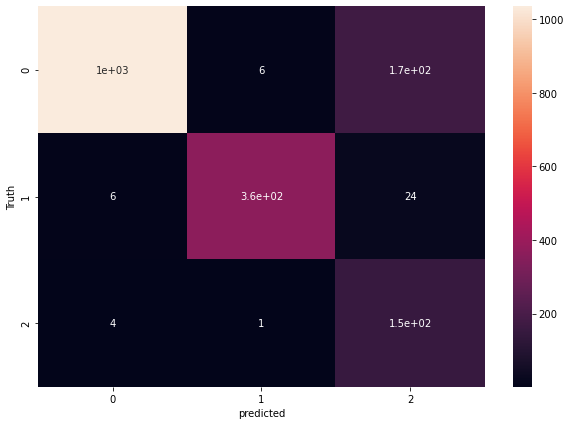

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(Gauscm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')